In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
# df['total_sqft']= df['total_sqft'].astype(int)

In [6]:
num_col = df.select_dtypes(include='number')
num_col

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00
...,...,...,...
13315,4.0,0.0,231.00
13316,5.0,NaN,400.00
13317,2.0,1.0,60.00
13318,4.0,1.0,488.00


<Axes: >

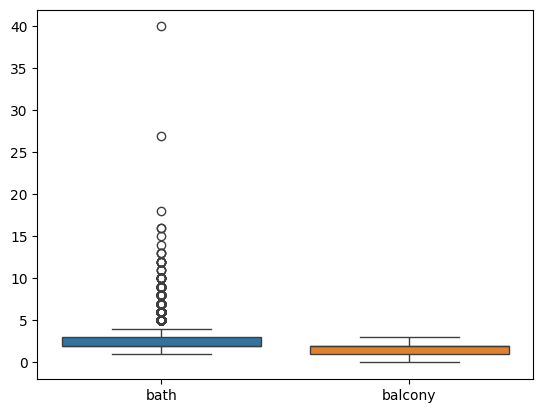

In [7]:
sns.boxplot(num_col.iloc[:,:2])

In [8]:
num_col.columns

Index(['bath', 'balcony', 'price'], dtype='object')

In [9]:
def zscore(col_name):
    return (num_col[col_name] - num_col[col_name].mean())/num_col[col_name].std()

bath_scaled = zscore('bath')
removed_outliers = bath_scaled[abs(bath_scaled)>=3]
# removed_outliers

bath_scaled.mean()

-1.491136714284803e-16

In [10]:
num_col.dropna

<bound method DataFrame.dropna of        bath  balcony   price
0       2.0      1.0   39.07
1       5.0      3.0  120.00
2       2.0      3.0   62.00
3       3.0      1.0   95.00
4       2.0      1.0   51.00
...     ...      ...     ...
13315   4.0      0.0  231.00
13316   5.0      NaN  400.00
13317   2.0      1.0   60.00
13318   4.0      1.0  488.00
13319   1.0      1.0   17.00

[13320 rows x 3 columns]>

In [11]:
sum(((num_col['bath']-num_col['bath'].mean())**2)/num_col.shape[0])

nan

In [12]:
bath_scaled.mean()

-1.491136714284803e-16

In [13]:
bath_scaled.std()

0.9999999999999999

In [14]:
bath_scaled[bath_scaled>10]

1718     18.120127
4684     27.811074
11559    11.411009
Name: bath, dtype: float64

<Axes: ylabel='bath'>

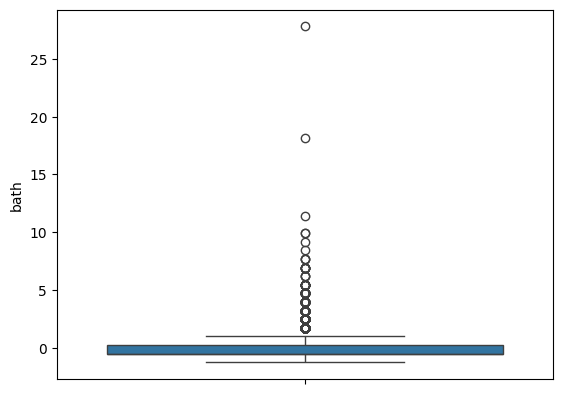

In [15]:
sns.boxplot(bath_scaled)

In [16]:
num_col

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00
...,...,...,...
13315,4.0,0.0,231.00
13316,5.0,NaN,400.00
13317,2.0,1.0,60.00
13318,4.0,1.0,488.00


In [17]:
num_col.dropna(inplace=True)

In [18]:
num_col

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00
...,...,...,...
13314,3.0,3.0,112.00
13315,4.0,0.0,231.00
13317,2.0,1.0,60.00
13318,4.0,1.0,488.00


In [19]:
X = num_col.drop('price',axis=1)
y = num_col.price

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,random_state=42)

In [22]:
scaler = StandardScaler()

In [23]:
xt_scaled = scaler.fit_transform(xtrain)

In [24]:
xt_scaled

array([[ 1.11308113, -0.71666992],
       [-0.49948693,  0.51114806],
       [ 1.11308113,  0.51114806],
       ...,
       [-0.49948693, -0.71666992],
       [ 0.3067971 ,  0.51114806],
       [ 0.3067971 ,  0.51114806]])

In [25]:
scaler.get_feature_names_out()

array(['bath', 'balcony'], dtype=object)

In [26]:
model = LinearRegression()

In [27]:
model.fit(xtrain,ytrain)

LinearRegression()

In [28]:
xtest_scaled = scaler.transform(xtest)
xtest_scaled

array([[ 0.3067971 , -0.71666992],
       [-0.49948693, -0.71666992],
       [-0.49948693, -0.71666992],
       ...,
       [-1.30577096, -1.9444879 ],
       [-0.49948693, -0.71666992],
       [ 1.11308113,  1.73896604]])

In [29]:
xtrain

,bath,balcony
7087,4.0,1.0
9422,2.0,2.0
2770,4.0,2.0
12230,6.0,2.0
7914,2.0,2.0
...,...,...
12533,2.0,1.0
5465,2.0,1.0
5675,2.0,1.0
903,3.0,2.0


<Axes: >

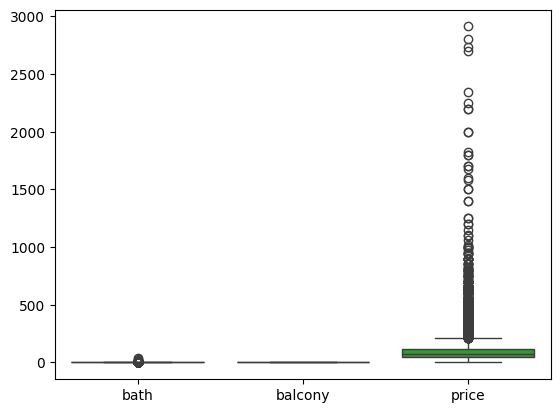

In [30]:
sns.boxplot(num_col)

In [31]:
model.coef_

array([46.84809322,  5.1053981 ])

In [32]:
model.score(xtrain,ytrain)

0.20303134272148882